## Files & Exceptional Handling Assigement

### Q1. Discuss scenarios where multithreading is preferable to multiprocessing and scenarios where multiprocessing is a better choice.

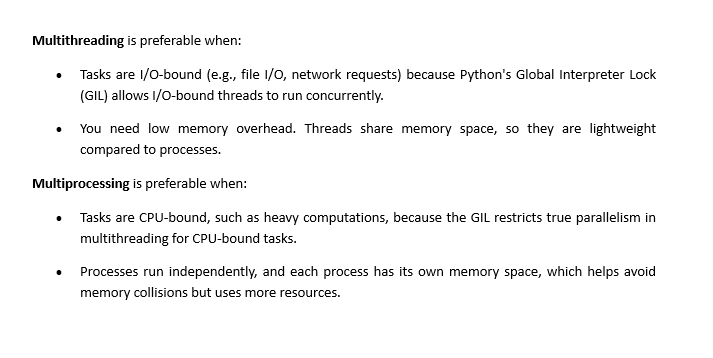

### Q2. Describe what a process pool is and how it helps in managing multiple processes efficiently.

#### A process pool is a collection of pre-initialized worker processes to which tasks can be assigned. It helps in managing multiple processes efficiently by:
##### •	Reducing overhead. Instead of spawning new processes for each task, the pool reuses existing ones.
##### •	Managing concurrency. It allows easy parallel execution of tasks, controls the number of worker processes, and distributes the workload evenly.
##### •	Simplifying parallelism. With libraries like `multiprocessing.Pool`, it provides easy-to-use interfaces for parallel execution.



### Q3. Explain what multiprocessing is and why it is used in Python programs.

#### Multiprocessing in Python refers to using multiple CPU cores by running multiple processes concurrently. It is used to:
##### •	Achieve parallelism for CPU-bound tasks.
##### •	Bypass Python's GIL, which limits multithreading efficiency for CPU-bound operations.
##### •	Improve performance for tasks that require intensive computation, like numerical simulations or large-scale data processing.


### Q4. Write a Python program using multithreading where one thread adds numbers to a list, and another thread removes numbers from the list. Implement a mechanism to avoid race conditions using `threading.Lock`.

In [ ]:
import threading
import time

# Shared resource
numbers = []

# Lock for avoiding race conditions
lock = threading.Lock()

# Variable to signal when addition is complete
adding_complete = False

# Thread to add numbers to the list
def add_numbers():
    global numbers, adding_complete
    for i in range(10):
        with lock:  # Acquire lock to ensure safe access
            print(f"Adding {i}")
            numbers.append(i)
        time.sleep(1)  # Simulate some work being done
    # Mark adding as complete
    with lock:
        adding_complete = True

# Thread to remove numbers from the list
def remove_numbers():
    global numbers, adding_complete
    while True:
        with lock:  # Acquire lock to ensure safe access
            if numbers:  # Only remove if there are elements in the list
                num = numbers.pop(0)
                print(f"Removed {num}")
            elif adding_complete:
                break  # Exit the loop if all numbers have been added and removed
        time.sleep(1)  # Simulate some work being done

# Create threads
adder_thread = threading.Thread(target=add_numbers)
remover_thread = threading.Thread(target=remove_numbers)

# Start threads
adder_thread.start()
remover_thread.start()

# Join threads to ensure completion
adder_thread.join()
remover_thread.join()

print("All numbers added and removed.")


Adding 0
Removed 0
Adding 1
Removed 1
Adding 2
Adding 3
Removed 2
Removed 3
Adding 4
Adding 5
Removed 4
Adding 6
Removed 5
Removed 6
Adding 7
Adding 8
Removed 7
Adding 9
Removed 8
Removed 9
All numbers added and removed.


### Q5. Describe the methods and tools available in Python for safely sharing data between threads and processes.

#### For threads:
##### •	threading.Lock: Ensures that only one thread can access a shared resource at a time, avoiding race conditions.
##### •	threading.RLock: A reentrant lock that allows the same thread to acquire the lock multiple times.
##### •	threading.Queue: A thread-safe FIFO queue that can be used to pass data between threads safely.

#### For processes:
##### •	multiprocessing.Queue: A process-safe queue for inter-process communication (IPC).
##### •	multiprocessing.Value and multiprocessing.Array: Shared memory objects that can be used for primitive data types and arrays, allowing safe data sharing between processes.



### Q6. Discuss why it’s crucial to handle exceptions in concurrent programs and the techniques available for doing so.

#### Handling exceptions in concurrent programs is crucial because:
##### •	Unhandled exceptions in one thread/process can affect the entire program or lead to unexpected behavior.
##### •	It ensures reliability, as tasks might fail due to external factors (e.g., network failure, resource unavailability).

#### Techniques include:
##### •	Try-except blocks around critical sections of code.
##### •	Using concurrent futures to capture and handle exceptions in thread pools or process pools.
##### •	Threading.Event for inter-thread signaling in case of failure.



### Q7. Create a program that uses a thread pool to calculate the factorial of numbers from 1 to 10 concurrently. Use `concurrent.futures.ThreadPoolExecutor` to manage the threads.

In [ ]:
import concurrent.futures
import math

# Function to calculate factorial
def factorial(n):
    return math.factorial(n)

# List of numbers
numbers = list(range(1, 11))

# Using ThreadPoolExecutor
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(factorial, numbers))

print("Factorials:", results)


Factorials: [1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


### Q8. Create a Python program that uses `multiprocessing.Pool` to compute the square of numbers from 1 to 10 in parallel. Measure the time taken to perform this computation using a pool of different sizes (e.g., 2, 4, 8 processes).

In [1]:
import multiprocessing
import time

# Function to calculate square of a number
def compute_square(n):
    return n * n

# Function to measure time with different pool sizes
def measure_time_with_pool(pool_size):
    numbers = list(range(1, 11))  # List of numbers from 1 to 10
    start_time = time.time()      # Start time

    # Create a Pool with the given pool_size
    with multiprocessing.Pool(pool_size) as pool:
        # Apply compute_square function in parallel
        result = pool.map(compute_square, numbers)

    end_time = time.time()        # End time
    return result, end_time - start_time  # Return the result and time taken

# Test with different pool sizes
pool_sizes = [2, 4, 8]
for size in pool_sizes:
    result, time_taken = measure_time_with_pool(size)
    print(f"Pool size: {size}, Time taken: {time_taken:.5f} seconds, Result: {result}")


Pool size: 2, Time taken: 0.03825 seconds, Result: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Pool size: 4, Time taken: 0.06831 seconds, Result: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Pool size: 8, Time taken: 0.12871 seconds, Result: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
